In [1]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,85271.000000,85271.000000,85270.000000,8.527000e+04
mean,277.872641,19258.870847,3.523496,1.196058e+09
std,155.875583,35277.240853,1.040897,2.121931e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,140.000000,1196.000000,3.000000,1.014924e+09
50%,288.000000,2987.000000,3.500000,1.179164e+09
75%,414.000000,7892.500000,4.000000,1.421374e+09
max,554.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação: heurística de total de votos

In [4]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

356     290
318     287
296     274
2571    250
593     248
Name: filmeId, dtype: int64

In [5]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,188.0
2,Jumanji (1995),Adventure|Children|Fantasy,94.0
3,Grumpier Old Men (1995),Comedy|Romance,46.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,6.0
5,Father of the Bride Part II (1995),Comedy,45.0


In [6]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,290.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,287.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,274.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,250.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,248.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,211.0
110,Braveheart (1995),Action|Drama|War,206.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,199.0


In [7]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()

filmeId
1    3.933511
2    3.398936
3    3.282609
4    2.500000
5    3.111111
Name: nota, dtype: float64

In [8]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,290.0,4.181034
318,"Shawshank Redemption, The (1994)",Crime|Drama,287.0,4.419861
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,274.0,4.177007
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,250.0,4.152000
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,248.0,4.151210
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224.0,4.216518
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,211.0,3.722749
110,Braveheart (1995),Action|Drama|War,206.0,4.014563
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,199.0,3.949749


# Uma segunda heurística: nota média e filtrando votos

In [9]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,1.0,5.0
138966,Nasu: Summer in Andalusia (2003),Animation,1.0,5.0
136355,Big Top Scooby-Doo! (2012),Animation|Children|Comedy,1.0,5.0
136359,Scooby-Doo Goes Hollywood (1979),Animation|Children|Comedy,1.0,5.0
136445,George Carlin: Back in Town (1996),Comedy,1.0,5.0
136447,George Carlin: You Are All Diseased (1999),Comedy,1.0,5.0
136469,Larry David: Curb Your Enthusiasm (1999),Comedy,1.0,5.0
136503,Tom and Jerry: Shiver Me Whiskers (2006),Animation|Children|Comedy,1.0,5.0
136834,The Eye: Infinity (2005),Horror,1.0,5.0


In [10]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1217,Ran (1985),Drama|War,11.0,4.590909
1178,Paths of Glory (1957),Drama|War,11.0,4.500000
1104,"Streetcar Named Desire, A (1951)",Drama,17.0,4.500000
3089,Bicycle Thieves (a.k.a. The Bicycle Thief) (a....,Drama,13.0,4.461538
1248,Touch of Evil (1958),Crime|Film-Noir|Thriller,13.0,4.461538
318,"Shawshank Redemption, The (1994)",Crime|Drama,287.0,4.419861
2360,"Celebration, The (Festen) (1998)",Drama,10.0,4.400000
176,Living in Oblivion (1995),Comedy,10.0,4.400000
926,All About Eve (1950),Drama,19.0,4.394737


In [11]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,287.0,4.419861
1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,123.0,4.288618
912,Casablanca (1942),Drama|Romance,88.0,4.272727
858,"Godfather, The (1972)",Crime|Drama,172.0,4.270349
1221,"Godfather: Part II, The (1974)",Crime|Drama,114.0,4.267544
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,89.0,4.264045
2959,Fight Club (1999),Action|Crime|Drama|Thriller,197.0,4.263959
1213,Goodfellas (1990),Crime|Drama,113.0,4.261062
48516,"Departed, The (2006)",Crime|Drama|Thriller,95.0,4.257895


In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,188.0,3.933511
21,Get Shorty (1995),Comedy|Crime|Thriller,77.0,3.422078
19,Ace Ventura: When Nature Calls (1995),Comedy,76.0,2.763158
10,GoldenEye (1995),Action|Adventure|Thriller,116.0,3.478448
11,"American President, The (1995)",Comedy|Drama|Romance,59.0,3.720339
7,Sabrina (1995),Comedy|Romance,49.0,3.234694
2,Jumanji (1995),Adventure|Children|Fantasy,94.0,3.398936


In [13]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,94.0,3.771277
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,52.0,3.509615


In [14]:
# Collaborative filtering x Content based filtering

# Procurar usuários "similares"

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância

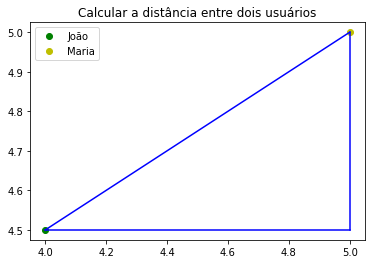

In [15]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [16]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [18]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre usuários')

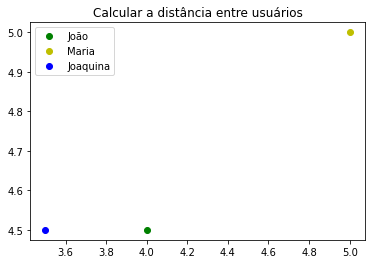

In [19]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")


In [20]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [21]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)


In [22]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [23]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [24]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [25]:
usuario4.head()

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [26]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

In [27]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [28]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [29]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 554 usuarios


In [30]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [31]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [32]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna()

,nota_1,nota5
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


In [33]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix="_1", rsuffix="2").dropna()

,nota_1,nota2
filmeId,,
333,5.0,4.0
3578,5.0,4.0


In [34]:
notas_do_usuario(1).join(notas_do_usuario(3), lsuffix="_1", rsuffix="3").dropna()

,nota_1,nota3
filmeId,,
527,5.0,0.5
1275,5.0,3.5
1587,5.0,4.5
2018,5.0,0.5
2090,5.0,0.5
2105,4.0,2.0
3703,5.0,5.0


# Usuários sem filmes em comum são colocados bem distante um do outro

In [35]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000]
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [36]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [37]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [38]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
258,1,1.000000
49,1,1.000000


# Parâmetros para teste

In [39]:
def mais_proximos_de(voce_id, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [40]:
def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [41]:
mais_proximos_de(1, n = 50)

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [42]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return None
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [43]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
  todos_os_usuarios = notas['usuarioId'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [44]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [45]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [46]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
  recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [47]:
sugere_para(1, numero_de_usuarios_a_analisar=50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,109.0,3.931193
4022,4.5,Cast Away (2000),Drama,89.0,3.724719
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,41.0,3.853659
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,130.0,4.065385
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,63.0,4.015873


In [48]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,66.0,3.848485
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,136.0,4.235294
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,102.0,3.877451
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,177.0,4.062147
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,108.0,3.523148


# Sugerindo baseado em vários usuários

In [49]:
def mais_proximos_de(voce_id, n_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(n_mais_proximos)

In [50]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [51]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

In [52]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,11.0,3.863636
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,76.0,4.138158
475,5.0,In the Name of the Father (1993),Drama,22.0,4.250000
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,102.0,3.877451
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,166.0,4.096386


In [53]:
sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,11.0,3.863636
802,5.0,Phenomenon (1996),Drama|Romance,42.0,3.369048
534,5.0,Shadowlands (1993),Drama|Romance,12.0,3.541667
1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,30.0,4.216667
515,5.0,"Remains of the Day, The (1993)",Drama|Romance,21.0,3.571429


In [54]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,124.0,4.064516
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,8.0,4.187500
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,68.0,3.860294
2300,5.0,"Producers, The (1968)",Comedy,30.0,4.050000


In [55]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [56]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending=False)
  return recomendacoes.join(filmes)

# Testar um usuário novo

In [74]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns = ["filmeId", "nota"])
  notas_do_usuario_novo['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])


In [82]:
dados = [ [144,2], [1246,5], [2529,2], [2329, 5], [2324, 5], [1, 2], [7, 0.5], [2, 2], [1196,1 ], [260, 1] ]
novo_usuario(dados)
notas.tail()

,usuarioId,filmeId,nota,momento
85266,554,2243,3.0,944902081.0
85267,554,2282,5.0,944902251.0
85268,554,2324,5.0,944898992.0
85269,554,2396,5.0,944898992.0
85270,554,249,NaN,NaN


In [83]:
sugere_para(554).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
3753,5.0,"Patriot, The (2000)",Action|Drama|War,59.0,3.457627
1207,5.0,To Kill a Mockingbird (1962),Drama,53.0,4.160377
35836,5.0,"40-Year-Old Virgin, The (2005)",Comedy|Romance,64.0,3.578125
1203,5.0,12 Angry Men (1957),Drama,52.0,4.182692
68954,5.0,Up (2009),Adventure|Animation|Children|Drama,92.0,4.021739


# Utilizar somente as notas de filmes com mais de 50 votos

In [93]:
notas = notas.set_index("filmeId").loc[filmes_com_mais_de_50_votos.index]
#notas.head()

In [95]:
notas = notas.reset_index()
notas.head()

,filmeId,index,usuarioId,nota,momento
0,1,0,1,4.0,9.649827e+08
1,1,1,5,4.0,8.474350e+08
2,1,2,7,4.5,1.106636e+09
3,1,3,15,2.5,1.510578e+09
4,1,4,17,4.5,1.305696e+09


In [96]:
sugere_para(554).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1961,5.0,Rain Man (1988),Drama,83.0,3.771084
1240,5.0,"Terminator, The (1984)",Action|Sci-Fi|Thriller,114.0,3.855263
68954,5.0,Up (2009),Adventure|Animation|Children|Drama,92.0,4.021739
1923,5.0,There's Something About Mary (1998),Comedy|Romance,88.0,3.647727
35836,5.0,"40-Year-Old Virgin, The (2005)",Comedy|Romance,64.0,3.578125


In [102]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors='ignore')
  return distancias.head(k_mais_proximos)

In [115]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
  aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
  filtro_minimo = k_mais_proximos/2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes")
  recomendacoes = recomendacoes.query("nota_aparicoes >= %.2f" % filtro_minimo)
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors='ignore')
  return recomendacoes.join(filmes)

In [116]:
sugere_para(554, k_mais_proximos = 20 ).head(10)

,nota_media_dos_usuarios,nota_aparicoes,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
2571,4.950000,10,"Matrix, The (1999)",Action|Sci-Fi|Thriller,250.0,4.152000
260,4.850000,10,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224.0,4.216518
318,4.642857,14,"Shawshank Redemption, The (1994)",Crime|Drama,287.0,4.419861
110,4.550000,10,Braveheart (1995),Action|Drama|War,206.0,4.014563
296,4.538462,13,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,274.0,4.177007
356,4.375000,16,Forrest Gump (1994),Comedy|Drama|Romance|War,290.0,4.181034
150,4.208333,12,Apollo 13 (1995),Adventure|Drama|IMAX,175.0,3.877143
1198,3.950000,10,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,180.0,4.213889


In [117]:
sugere_para(554).head(10)

,nota_media_dos_usuarios,nota_aparicoes,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
260,4.900000,5,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224.0,4.216518
1704,4.700000,5,Good Will Hunting (1997),Drama|Romance,124.0,4.064516
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,287.0,4.419861
296,4.571429,7,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,274.0,4.177007
356,4.571429,7,Forrest Gump (1994),Comedy|Drama|Romance|War,290.0,4.181034
110,4.500000,5,Braveheart (1995),Action|Drama|War,206.0,4.014563
1193,4.500000,5,One Flew Over the Cuckoo's Nest (1975),Drama,121.0,4.206612
150,4.416667,6,Apollo 13 (1995),Adventure|Drama|IMAX,175.0,3.877143
1270,4.400000,5,Back to the Future (1985),Adventure|Comedy|Sci-Fi,149.0,4.053691
